# Intro to Data Analysis

This initial project will go through the basics of data analysis using Python. We will be examining a small dataset based off the passengers of the Titanic, consisting of their names, genders, ages, cabin class, ticket cost, where they boarded from, and whether or not they survived the sinking of the ship.

The main question to be addressed in this project is: "What factors made people more likely to survive?"

## Project - Investigate a Dataset

Start off by importing required libraries, reading in the csv file, and printing out the names of rows & columns.

In [119]:
import pandas, numpy, matplotlib.pyplot as plt, csv

In [120]:
titanic=pandas.read_csv('titanic-data.csv')
titanic.axes

[RangeIndex(start=0, stop=891, step=1),
 Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
        u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
       dtype='object')]

The axes attribute tells us the name of the columns, as well as how many rows there are. Now we use the head function to get a look at part of the dataset, followed by the describe function to get some preliminary statistics.

In [121]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This table tells us quite a bit about the data.

First off, we see that we're working with a total of 891 entries in the dataset, but there are only 714 entries for the Age column, compared to the 891 for the rest of the columns. So we know that we have 177 missing age entries. Taking a closer look at the column, we have a minimum value of 0.42, which is strange to use as an age value, so this column will need to be cleaned up a little.

Next, we see that there are ~38% of the passengers that survived the crash. This table doesn't tell us anything more about that, or why, so there's still more work to be done here to answer our main question.

Another possibly odd situation is that there is a minimum of 0 for the Fare. While it isn't impossible that someone could have gotten a free ticket, we'll want to take a closer look at this column to make sure that there aren't multiple occurrences of this.

Let's start with the Fare column, to see how many occurrences of 0 costs there are.

In [123]:
titanic.sort_values('Fare').where(titanic['Fare']==0).head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272.0,1.0,3.0,"Tornquist, Mr. William Henry",male,25.0,0.0,0.0,LINE,0.0,NaN,S
597,598.0,0.0,3.0,"Johnson, Mr. Alfred",male,49.0,0.0,0.0,LINE,0.0,NaN,S
302,303.0,0.0,3.0,"Johnson, Mr. William Cahoone Jr",male,19.0,0.0,0.0,LINE,0.0,NaN,S
633,634.0,0.0,1.0,"Parr, Mr. William Henry Marsh",male,NaN,0.0,0.0,112052,0.0,NaN,S
277,278.0,0.0,2.0,"Parkes, Mr. Francis ""Frank""",male,NaN,0.0,0.0,239853,0.0,NaN,S
413,414.0,0.0,2.0,"Cunningham, Mr. Alfred Fleming",male,NaN,0.0,0.0,239853,0.0,NaN,S
674,675.0,0.0,2.0,"Watson, Mr. Ennis Hastings",male,NaN,0.0,0.0,239856,0.0,NaN,S
263,264.0,0.0,1.0,"Harrison, Mr. William",male,40.0,0.0,0.0,112059,0.0,B94,S
466,467.0,0.0,2.0,"Campbell, Mr. William",male,NaN,0.0,0.0,239853,0.0,NaN,S
732,733.0,0.0,2.0,"Knight, Mr. Robert J",male,NaN,0.0,0.0,239855,0.0,NaN,S


We see that there are 15 entries where the Fare is 0. There are a few explanations for this situation. The tickets could have been gifts, there may have been an error in marking down the cost, or perhaps they got tickets in a giveaway or contest of some sort. All these people embarked from the same port as well, so that may lend credibility to the explanations. Any of these situations are plausible, so there's no need to leave out these entries from our investigations.

Next, let's see what's going on with the age column's values.

In [124]:
titanic.sort_values('Age').head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


There are at least 7 values that have non-integer entries for the age column. While it would be easy to mark them as erroneous and move on, a quick Google search of the names reveals that these individuals were infact infants at the time of boarding.

https://www.encyclopedia-titanica.org/titanic-survivor/assad-alexander-thomas-tannous.html

https://www.encyclopedia-titanica.org/titanic-survivor/viljo-hamalainen.html

From here, it would be safe to assume that the decimal notation for the ages is intentional, and nothing that needs to be ignored, aside from the NaN values, which python will do on its own in computations.

Now to answer the question itself, what factors influenced surviving? We'll start by using the corr function to see correlations between each column.

In [125]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Looking at this table, the Survived row has the highest correlation with the Passenger Class & Fare columns, telling us that the wealthier travellers were the ones that were more likely to survive.

In addition, looking at the Pclass row, the highest correlations are with the Age & Fare columns, indicating that the the wealthier passengers tended to be older as well.

We also see that there were a good amount of families travelling together, not limited to any specific class, indicated by the correlation between the Sibling/Spouse & Parent/Child columns.

In [126]:
# Statistics of the Survivors sorted by Passenger Class
titanic.groupby('Pclass').describe()['Survived']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


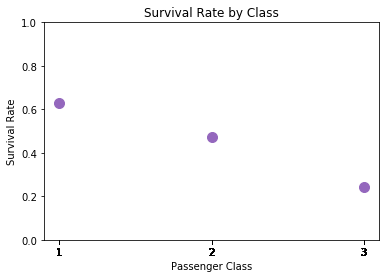

In [127]:
# Graph showing average percent of survivors for each class
plt.plot(titanic.groupby('Pclass').mean()['Survived'], 'o', ms=10)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class')
plt.xticks(titanic['Pclass'])
plt.ylim([0, 1])
plt.show()

The table & plot above shows that the highest percentages of survivors, at 63%, were First class, 47% in Second class, and only 24% of the Third class passengers survived the sinking of the ship.

In [128]:
# Statistics of the ticket costs sorted by Passenger Class
titanic.groupby('Pclass').describe()['Fare']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


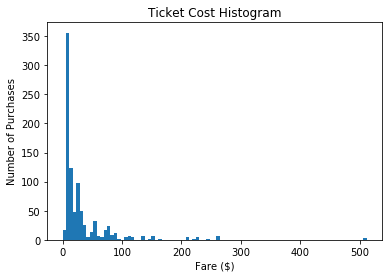

In [129]:
# Histogram of ticket costs
plt.hist(titanic['Fare'], bins=89)
plt.xlabel('Fare ($)')
plt.ylabel('Number of Purchases')
plt.title('Ticket Cost Histogram')
plt.show()

The above table shows that First class tickets were significantly higher in cost than the lower class tickets.
The histogram shows the distribution of the number of tickets sold at given costs.

In [130]:
# Statistics of the ages of the passengers sorted by their class
titanic.groupby('Pclass').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


Keeping in mind that we're only working with 714 entries for the Ages, the third table affirms that the wealthier passengers tended to be older.

Now that the investigations based on the correlations in the dataset are done with, let's move on to some of the reasons that people are usually prioritized for saving. Namely, giving preference to women & children.

In [131]:
# Statistics of the survival rate of passengers sorted by their gender
titanic.groupby('Sex').describe()['Survived']

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


This table shows us that 74% of the women on board the Titanic survived, while only 19% of the men did, support the idea that women were prioritized for lifeboat room over men.

Finally, let's look at the survival rate for children. While the cutoff for being a child can be ambiguous, let's go with the legal description of 17 & under.

In [132]:
# Number of child passengers
titanic.sort_values('Age').where(titanic['Age']<18).count()

PassengerId    113
Survived       113
Pclass         113
Name           113
Sex            113
Age            113
SibSp          113
Parch          113
Ticket         113
Fare           113
Cabin           19
Embarked       113
dtype: int64

In [133]:
# Number of child survivors
sum(titanic.sort_values('Age').where(titanic['Age']<18)['Survived'].dropna())

61.0

In [134]:
# Getting a percent value for survival
61.0/113.0

0.5398230088495575

In [135]:
# Number of adult passengers
titanic.sort_values('Age').where(titanic['Age']>=18).count()

PassengerId    601
Survived       601
Pclass         601
Name           601
Sex            601
Age            601
SibSp          601
Parch          601
Ticket         601
Fare           601
Cabin          166
Embarked       599
dtype: int64

In [136]:
# Number of adult survivors
sum(titanic.sort_values('Age').where(titanic['Age']>=18)['Survived'].dropna())

229.0

In [137]:
# Getting a percent value for survival
229.0/601.0

0.3810316139767055

Here we see that of the 113 child passengers, 61 survived, while 229 of the 601 adults survived, 54% to 38% respectively. While it seems that age was not a significant factor in survivability, we are missing 177 age values, so it is possible that age was a bigger factor than it is indicated by the dataset.

## Conclusion

Having gone through the data, we have an answer to our initial question. It seems that gender was the main determinant in whether a passenger survived the Titanic accident or not. The passenger's wealth and class was certainly a significant secondary factor, with the wealthier ones given priority. Even amongst these survivors, it is possible that location of the cabin and location at the time of the incident would have made a difference in whether they were able to make it off the ship in time.

The missing values for the ages could have given more significance to how much relevance age had in determining survival rate, as we would naturally assume that women & children would be given priority in these situations. Even without having those values though, statistical significance tests would go a long way towards determining how important Passenger Class & Gender were in influencing the survival rates of the passengers.